In [ ]:
# SUPERVISED MACHINE LEARNING
# REGRESSION - Simple Linear Regression

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Stage 1: Data Gathering
data = pd.read_csv("https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv")
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [ ]:
# Stage 2: EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [ ]:
# Stage 3:Data Preparation
# a.) check for missing values
# b.) check for duplicates records
# c.) convert non-numerical features into numerical features
# d.) normalization
# e.) select independent and dependent variable

In [ ]:
# a.) check for missing values
data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [ ]:
# b.) check for duplicates records
data.duplicated().sum()

np.int64(0)

In [ ]:
# c.) convert non-numerical features into numerical features
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [ ]:
lb.fit_transform(['yes','no','no','yes'])

array([[1],
       [0],
       [0],
       [1]])

In [ ]:
lb.fit_transform(['male','female','female','male'])

array([[1],
       [0],
       [0],
       [1]])

In [ ]:
lb.fit_transform(['pass','fail','fail','pass'])

array([[1],
       [0],
       [0],
       [1]])

In [ ]:
lb.fit_transform(['success', 'failure'])

array([[1],
       [0]])

In [ ]:
data.Status =lb.fit_transform(data.Status)
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      int64 
 3   Result         9 non-null      object
dtypes: int64(3), object(1)
memory usage: 420.0+ bytes


In [ ]:
# d.) normalization
# For ML, every dataset does not require normalization. It is
# required only when fx have diff ranges

# The goal of normalization is to change the values of numeric columns in the dataset to
# a common scale

# when normalize data, you're not changing its meaning --> you're just changing
# its scale so that the model can learn efficiently

# after normalization fx are on comparable scale

# 2000 --> 0.002036
# model trains on 0.002 instead of 2000


#min = 1800
#max = 100000
#x   = 2000

#Xnorm = (X-Xmin) / (Xmax - Xmin)

#Xnorm = (2000-1800) / (100000-1800)
#Xnorm = 0.002036659877800407


#Xnorm = (4500-1800) / (100000-1800)
#Xnorm =  0.0274949083503055

#Xnorm = (4500-1800)/(100000-1800)
#Xnorm

In [ ]:
val = data.Test_Grade.values
print(val)

nrmlz1 = pp.normalize([val])
print(nrmlz1)

[ 57  66  73  76  79  81  90  96 100]
[[0.23500809 0.27211463 0.30097527 0.31334412 0.32571297 0.33395887
  0.37106541 0.3958031  0.4122949 ]]


In [ ]:
nrmlz2 =pp.MinMaxScaler().fit_transform([val])
print(nrmlz2)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# e.) select independent and dependent variable

# X --> Independent Variable

X = data.Hours_Studied.values
X

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Y --> dependent variable
Y = data.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
#scikit-learn expects X to be 2D even if you have only one fx
X = data.Hours_Studied.values
X.shape
X = X.reshape(9,1)
X.shape

(9, 1)

In [ ]:
# Reshape only use for 1 independent value
X = data.Hours_Studied.values
X.reshape(9,1)

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
# Stage 4: Model Development [Apply A Suitable Algor]

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [ ]:
# Reshape X to be 2D as required by scikit-learn
X_reshaped = X.reshape(-1, 1)

lin_reg.fit(X_reshaped, Y)

LinearRegression()

In [ ]:
# save our trained model
import pickle
pickle.dump(lin_reg,open('Linear_reg.pkl','wb'))
# w --> write means create b--> byte stream

In [ ]:
# Stage 5: Evaluation
data['predicted value'] = lin_reg.predict(X_reshaped)


In [ ]:
data[['Hours_Studied','Test_Grade','predicted value']]

,Hours_Studied,Test_Grade,predicted value
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [ ]:
pred_values = lin_reg.predict(X_reshaped)
pred_values

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

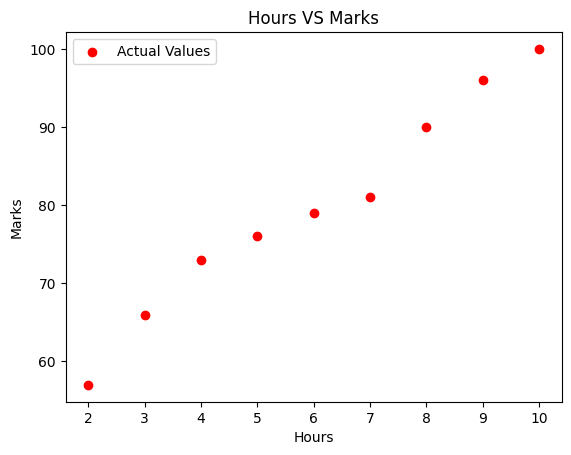

In [ ]:
# plot actual values
plt.scatter(X,Y, color='red', label='Actual Values')
plt.title('Hours VS Marks')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

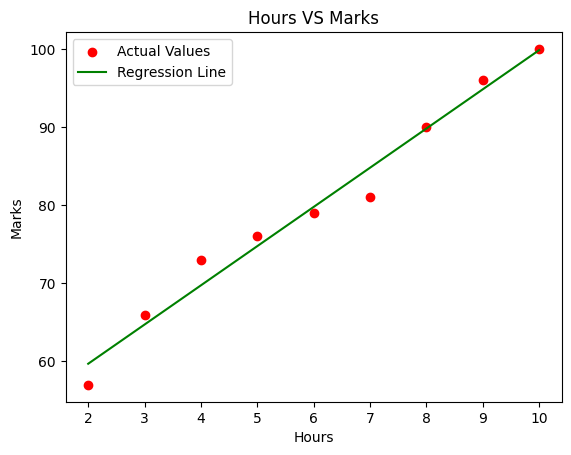

In [ ]:
# plot actual values
plt.scatter(X,Y, color='red', label='Actual Values')

#plot predicted values
plt.plot(X,pred_values, color='green', label='Regression Line')
plt.title('Hours VS Marks')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [ ]:
# R-squared
# after fitting the line we want to know how well the explains the data -
# that's where R2 coems in
# R2 = 0.97 that means 97% of variation in Y is explained by the model

from sklearn.metrics import r2_score
accuracy = r2_score(Y,pred_values)
print('Regression Score Function:',accuracy)
print(f'Regression Score Function: {int(accuracy*100)}')

Regression Score Function: 0.9757431074095347
Regression Score Function: 97


In [ ]:
# Stage 6: Final Prediction
hrs =float(input('How Many Hours You Studied In A Day:',))
if hrs > 10:
    print("Error: Hours cannot be more than 10. Please enter a valid number (0–10).")
else:
    marks = lin_reg.predict([[hrs]])  #adding one more dimension here
    print('Predicted Marks:', marks, 'Marks')

How Many Hours You Studied In A Day:10
Predicted Marks: [99.84444444] Marks


In [ ]:
hrs = float(input('How Many Hours You Studied In A Day : '))
marks = lin_reg.predict([[hrs]]) # adding 1 more dimension here using [[hrs]]
if marks>=1 and marks<=100:
  #marks = lin_reg.predict([[hrs]]) # adding 1 more dimension here using [[hrs]]
  print(f'You Can Score {int(marks[0])} % Marks')
else:
  print('Irrelevent Score Achive')

How Many Hours You Studied In A Day : 11
Irrelevent Score Achive
